In [1]:
# %% [markdown]
# # Machine Learning Pipeline for Diseases and Symptoms Dataset
# 
# This notebook implements a complete ML pipeline for solving a classification problem using the Diseases and Symptoms Dataset from Kaggle.
# 
# The pipeline includes:
# 1. Dataset loading & exploratory data analysis (EDA)
# 2. Data preprocessing:
#    - Data cleaning
#    - Missing value imputation
#    - Dimensionality reduction
#    - Data balancing
#    - Normalization
#    - Feature engineering
# 3. Splitting data into training, validation, and test sets
# 4. Baseline model training (Decision Tree)
# 5. Neural network implementation (with default hyperparameters)
# 6. Hyperparameter tuning experiments
# 7. Dataset modifications (improvement and degradation)
# 8. Network architecture enhancements and convergence analysis
# 9. Adding a new metric (AUC)
# 10. Experimenting with data imbalance
# 11. Applying PCA for dimensionality reduction

# %%
# Import necessary libraries

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.decomposition import PCA
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from collections import Counter

import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.utils import to_categorical

# For balancing (if needed)
# !pip install imbalanced-learn  # Uncomment if imbalanced-learn is not installed
from imblearn.over_sampling import SMOTE



Dataset shape: (246945, 378)


,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [43]:
# %%
# ## 1. Load the Dataset
# Assume the dataset file is named 'Final_Augmented_dataset_Diseases_and_Symptoms.csv' and is in the working directory.
data = pd.read_csv("Final_Augmented_dataset_Diseases_and_Symptoms.csv")
print("Dataset shape:", data.shape)
data.head()

Dataset shape: (246945, 378)


,diseases,anxiety and nervousness,depression,shortness of breath,depressive or psychotic symptoms,sharp chest pain,dizziness,insomnia,abnormal involuntary movements,chest tightness,...,stuttering or stammering,problems with orgasm,nose deformity,lump over jaw,sore in nose,hip weakness,back swelling,ankle stiffness or tightness,ankle weakness,neck weakness
0,panic disorder,1,0,1,1,0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,0
1,panic disorder,0,0,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
2,panic disorder,1,1,1,1,0,1,1,0,0,...,0,0,0,0,0,0,0,0,0,0
3,panic disorder,1,0,0,1,0,1,1,1,0,...,0,0,0,0,0,0,0,0,0,0
4,panic disorder,1,1,0,0,0,0,1,1,1,...,0,0,0,0,0,0,0,0,0,0


In [33]:
try:
    
    column_list = data.columns.tolist()
    print(column_list)
except FileNotFoundError:
    print(f"Error: File not found at '{csv_file_path}'")
except Exception as e:
    print(f"An error occurred: {e}")

['diseases', 'anxiety and nervousness', 'depression', 'shortness of breath', 'depressive or psychotic symptoms', 'sharp chest pain', 'dizziness', 'insomnia', 'abnormal involuntary movements', 'chest tightness', 'palpitations', 'irregular heartbeat', 'breathing fast', 'hoarse voice', 'sore throat', 'difficulty speaking', 'cough', 'nasal congestion', 'throat swelling', 'diminished hearing', 'lump in throat', 'throat feels tight', 'difficulty in swallowing', 'skin swelling', 'retention of urine', 'groin mass', 'leg pain', 'hip pain', 'suprapubic pain', 'blood in stool', 'lack of growth', 'emotional symptoms', 'elbow weakness', 'back weakness', 'pus in sputum', 'symptoms of the scrotum and testes', 'swelling of scrotum', 'pain in testicles', 'flatulence', 'pus draining from ear', 'jaundice', 'mass in scrotum', 'white discharge from eye', 'irritable infant', 'abusing alcohol', 'fainting', 'hostile behavior', 'drug abuse', 'sharp abdominal pain', 'feeling ill', 'vomiting', 'headache', 'nause

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246945 entries, 0 to 246944
Columns: 378 entries, diseases to neck weakness
dtypes: int64(377), object(1)
memory usage: 712.2+ MB
None
       anxiety and nervousness     depression  shortness of breath  \
count            246945.000000  246945.000000        246945.000000   
mean                  0.039235       0.042746             0.086440   
std                   0.194155       0.202285             0.281014   
min                   0.000000       0.000000             0.000000   
25%                   0.000000       0.000000             0.000000   
50%                   0.000000       0.000000             0.000000   
75%                   0.000000       0.000000             0.000000   
max                   1.000000       1.000000             1.000000   

       depressive or psychotic symptoms  sharp chest pain      dizziness  \
count                     246945.000000     246945.000000  246945.000000   
mean                           0

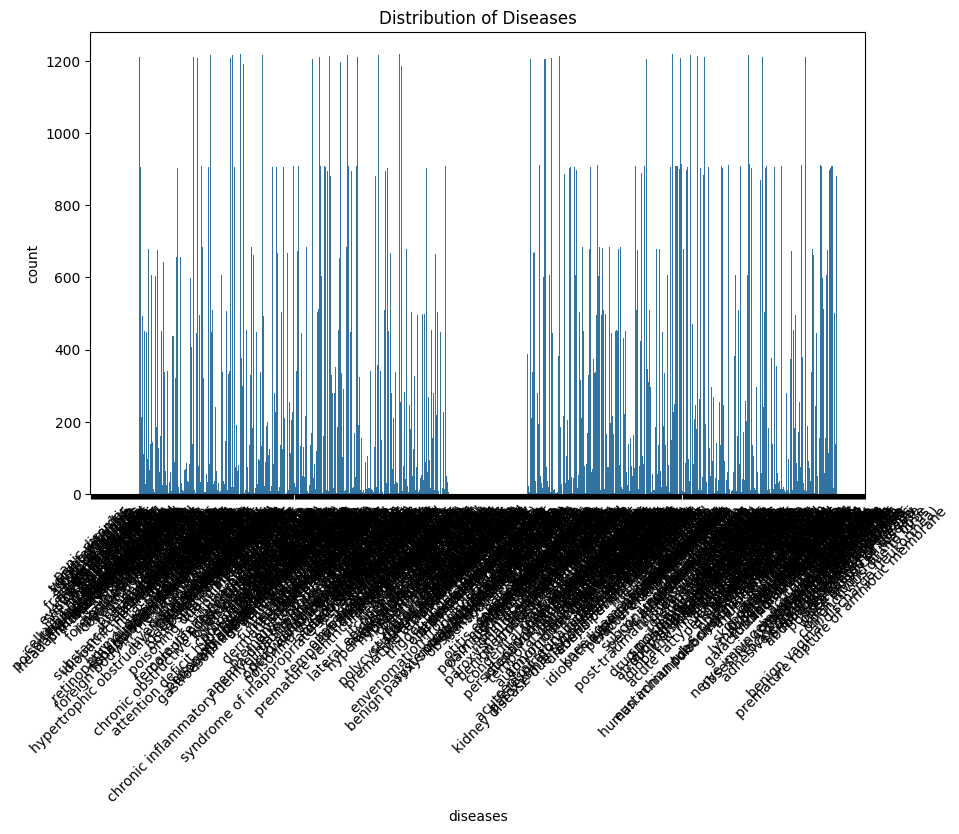

In [3]:
# %%
# ## 2. Exploratory Data Analysis (EDA)
print(data.info())
print(data.describe())

# For demonstration, we assume the target column is 'diseases' and the rest are features.
# Plot the distribution of diseases.
plt.figure(figsize=(10,6))
sns.countplot(x='diseases', data=data)
plt.xticks(rotation=45)
plt.title("Distribution of Diseases")
plt.show()

In [4]:
# Remove classes that have fewer than 2 samples
class_counts = data['diseases'].value_counts()
rare_classes = class_counts[class_counts < 2].index
if len(rare_classes) > 0:
    print("Removing classes with too few samples:", list(rare_classes))
    data = data[~data['diseases'].isin(rare_classes)]

Removing classes with too few samples: ['gas gangrene', 'thalassemia', 'open wound of the head', 'turner syndrome', 'foreign body in the nose', 'kaposi sarcoma', 'open wound of the cheek', 'high blood pressure', 'heat stroke', 'diabetes', 'myocarditis', 'open wound of the chest', 'chronic ulcer', 'huntington disease', 'typhoid fever', 'rocky mountain spotted fever', 'open wound of the knee', 'hypergammaglobulinemia', 'open wound due to trauma']


In [10]:


# %%
# ## 3. Data Preprocessing

# --- 3a. Data Cleaning ---
# Remove duplicate rows
data.drop_duplicates(inplace=True)

# --- 3b. Data Completion (Handling Missing Values) ---
# For simplicity, fill missing values using forward fill.
##data.fillna(method='ffill', inplace=True)
data = data.ffill()
##data.fillna(method='ffill') # if you don't want inplace
# --- 3c & 3d. Dimensionality Reduction & Data Balancing ---
# (Will be applied later as needed)

# --- 3e. Normalization & Feature Engineering ---
# Define the target column correctly
target_col = 'diseases'

# Define feature columns: exclude the target
feature_cols = [col for col in data.columns if col != target_col]

# Identify numeric and non-numeric features in the feature set
numeric_features = data[feature_cols].select_dtypes(include=[np.number]).columns.tolist()
non_numeric_features = [col for col in feature_cols if col not in numeric_features]

# Encode non-numeric features
if non_numeric_features:
    for col in non_numeric_features:
        data[col] = LabelEncoder().fit_transform(data[col])
    # After encoding, update the list of numeric features (all features are now numeric)
    numeric_features = feature_cols

# Apply scaling to the numeric features only
scaler = StandardScaler()
data[numeric_features] = scaler.fit_transform(data[numeric_features])

# Encode the target variable
le = LabelEncoder()
data['disease_encoded'] = le.fit_transform(data[target_col])


In [20]:
# Separate features and target
X = data[feature_cols]
y = data['disease_encoded']

# Remove classes with fewer than 2 samples to enable stratified splitting
class_counts = y.value_counts()
rare_classes = class_counts[class_counts < 5].index.tolist()
if rare_classes:
    print("Removing classes with fewer than 2 samples:", rare_classes)
    mask = ~y.isin(rare_classes)
    X = X[mask]
    y = y[mask]

Removing classes with fewer than 2 samples: [578, 287, 546, 341, 721, 320, 238, 255, 486, 484, 46, 430, 477, 739, 338, 669, 560, 186, 386, 555, 507, 159, 751, 272, 699, 188, 745, 602, 206, 748, 187, 76, 388, 709, 753, 217, 241, 324, 81, 310, 147, 303, 678, 34, 291, 647, 557, 335, 523, 322, 573, 495, 461, 455, 227, 177, 447, 13, 189, 744, 472, 271, 719, 478, 492, 215, 100, 160, 526, 378, 297, 483, 722, 410, 325, 487, 603, 703, 623, 432, 96, 179, 54, 609, 582, 737, 158, 705, 171, 232, 598, 24, 475, 655, 420, 275]


In [21]:
# ## 4. Split the Data into Training, Validation, and Test Sets
# Separate features and target
X = data[feature_cols]
y = data['disease_encoded']

# Option 1: Remove stratification
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.3, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

print("Training set:", X_train.shape, y_train.shape)
print("Validation set:", X_val.shape, y_val.shape)
print("Test set:", X_test.shape, y_test.shape)



Training set: (132739, 378) (132739,)
Validation set: (28444, 378) (28444,)
Test set: (28445, 378) (28445,)


In [25]:
from collections import Counter
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report

# Assuming you have your data in X and y (features and labels)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check class distribution in the training set
class_counts = Counter(y_train)
min_samples = min(class_counts.values())

# Always use cost-sensitive Random Forest, but add a check for extremely low numbers.
if min_samples < 2:
    print("Warning: Extremely small minority class (less than 2 samples).")
    print("Using cost-sensitive Random Forest with adjusted parameters.")
    rf_classifier = RandomForestClassifier(
        random_state=42,
        class_weight='balanced',
        n_estimators=100,  # Or adjust as needed.
        max_depth=10,  # Or adjust as needed.
        min_samples_split=2, # Ensure split is possible.
        min_samples_leaf=1, # Ensure leaf is possible.
        max_features='sqrt'
    )
elif min_samples < 5:
    print("Warning: Small minority class (less than 5 samples).")
    print("Using cost-sensitive Random Forest.")
    rf_classifier = RandomForestClassifier(
        random_state=42,
        class_weight='balanced',
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt'
    )
else:
    print("Using cost-sensitive Random Forest.")
    rf_classifier = RandomForestClassifier(
        random_state=42,
        class_weight='balanced',
        n_estimators=100,
        max_depth=10,
        min_samples_split=5,
        min_samples_leaf=2,
        max_features='sqrt'
    )

# Train the classifier
rf_classifier.fit(X_train, y_train)

# Make predictions on the test set
y_pred = rf_classifier.predict(X_test)

# Evaluate the model
print(classification_report(y_test, y_pred))

#Optional: Print class distribution
print("Train Class Distribution:", Counter(y_train))
print("Test Class Distribution:", Counter(y_test))

Using cost-sensitive Random Forest with adjusted parameters.


C:\Users\Ezra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ezra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ezra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{

              precision    recall  f1-score   support

           0       0.53      1.00      0.69         9
           1       0.96      1.00      0.98        49
           2       0.29      0.96      0.45        28
           3       0.05      1.00      0.09         1
           4       0.41      0.87      0.55        30
           5       0.02      1.00      0.04         1
           6       1.00      0.50      0.67         2
           7       0.25      0.33      0.29         3
           8       0.57      0.94      0.71        66
           9       1.00      0.54      0.70       155
          10       0.92      0.55      0.69       260
          11       0.79      0.83      0.81       230
          12       0.58      0.64      0.61       165
          14       0.26      0.21      0.24        28
          15       1.00      0.16      0.27       177
          16       0.94      0.62      0.75       109
          17       0.99      0.32      0.48       244
          18       1.00    

In [26]:
# ## 5. Baseline Model: Decision Tree Classifier
dt_clf = DecisionTreeClassifier(random_state=42)
dt_clf.fit(X_train_bal, y_train_bal)
y_pred_dt = dt_clf.predict(X_test)

# Evaluate the baseline model
acc_dt = accuracy_score(y_test, y_pred_dt)
prec_dt = precision_score(y_test, y_pred_dt, average='weighted')
recall_dt = recall_score(y_test, y_pred_dt, average='weighted')
f1_dt = f1_score(y_test, y_pred_dt, average='weighted')

print("Decision Tree Performance:")
print(f"Accuracy: {acc_dt:.4f}, Precision: {prec_dt:.4f}, Recall: {recall_dt:.4f}, F1-score: {f1_dt:.4f}")


C:\Users\Ezra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\Ezra\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\metrics\_classification.py:1531: UndefinedMetricWarning: Recall is ill-defined and being set to 0.0 in labels with no true samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


Decision Tree Performance:
Accuracy: 0.9993, Precision: 0.9992, Recall: 0.9993, F1-score: 0.9991


In [27]:
# ## 6. Neural Network with Default Hyperparameters

# Define a simple MLP model
model = Sequential([
    Dense(64, activation='relu', input_shape=(X_train_bal.shape[1],)),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(len(le.classes_), activation='softmax')
])

model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Train the model with early stopping
early_stop = EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)
history = model.fit(X_train_bal, y_train_bal,
                    epochs=50,
                    batch_size=32,
                    validation_data=(X_val, y_val),
                    callbacks=[early_stop],
                    verbose=1)

# Evaluate on test set
nn_loss, nn_accuracy = model.evaluate(X_test, y_test, verbose=0)
print("Neural Network Test Accuracy: {:.4f}".format(nn_accuracy))


C:\Users\Ezra\AppData\Local\Programs\Python\Python312\Lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/50
4149/4149 ━━━━━━━━━━━━━━━━━━━━ 44s 9ms/step - accuracy: 0.3891 - loss: 3.4721 - val_accuracy: 0.8298 - val_loss: 0.6070
Epoch 2/50
4149/4149 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - accuracy: 0.7775 - loss: 0.7731 - val_accuracy: 0.8712 - val_loss: 0.4283
Epoch 3/50
4149/4149 ━━━━━━━━━━━━━━━━━━━━ 36s 9ms/step - accuracy: 0.8145 - loss: 0.6092 - val_accuracy: 0.8831 - val_loss: 0.3827
Epoch 4/50
4149/4149 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - accuracy: 0.8283 - loss: 0.5544 - val_accuracy: 0.8839 - val_loss: 0.3571
Epoch 5/50
4149/4149 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - accuracy: 0.8422 - loss: 0.5122 - val_accuracy: 0.8954 - val_loss: 0.3196
Epoch 6/50
4149/4149 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - accuracy: 0.8489 - loss: 0.4793 - val_accuracy: 0.8972 - val_loss: 0.3071
Epoch 7/50
4149/4149 ━━━━━━━━━━━━━━━━━━━━ 38s 9ms/step - accuracy: 0.8533 - loss: 0.4624 - val_accuracy: 0.9010 - val_loss: 0.3043
Epoch 8/50
4149/4149 ━━━━━━━━━━━━━━━━━━━━ 39s 9ms/step - accuracy: 0.8582 - loss: 0

In [28]:
# ## 7. Compare Baseline and Neural Network Metrics
print("Baseline (Decision Tree) Accuracy:", acc_dt)
print("Neural Network Accuracy:", nn_accuracy)
# (Other metrics can be compared similarly)

Baseline (Decision Tree) Accuracy: 0.9992617201919527
Neural Network Accuracy: 0.9246427416801453


In [44]:
# ## 8. Hyperparameter Tuning for Neural Network
# Tune 3 hyperparameters: learning rate, batch size, and number of epochs.
learning_rates = [0.001, 0.01, 0.1]
batch_sizes = [16, 32, 64]
epoch_list = [30, 50, 70]

results = {}
for lr in learning_rates:
    for batch in batch_sizes:
        for epochs in epoch_list:
            tf.keras.backend.clear_session()
            
            # Define model using an Input layer
            inputs = tf.keras.Input(shape=(X_train_bal.shape[1],))
            x = Dense(64, activation='relu')(inputs)
            x = Dropout(0.2)(x)
            x = Dense(32, activation='relu')(x)
            outputs = Dense(len(le.classes_), activation='softmax')(x)
            model_tune = tf.keras.Model(inputs, outputs)
            
            optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
            model_tune.compile(optimizer=optimizer,
                               loss='sparse_categorical_crossentropy',
                               metrics=['accuracy'])
            
            history_tune = model_tune.fit(X_train_bal, y_train_bal,
                                          epochs=epochs,
                                          batch_size=batch,
                                          validation_data=(X_val, y_val),
                                          callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)],
                                          verbose=0)
            test_loss, test_acc = model_tune.evaluate(X_test, y_test, verbose=0)
            results[(lr, batch, epochs)] = test_acc
            print(f"LR: {lr}, Batch: {batch}, Epochs: {epochs} => Test Accuracy: {test_acc:.4f}")

best_params = max(results, key=results.get)
print("Best hyperparameters (learning rate, batch size, epochs):", best_params, "with accuracy:", results[best_params])


LR: 0.001, Batch: 16, Epochs: 30 => Test Accuracy: 0.9049
LR: 0.001, Batch: 16, Epochs: 50 => Test Accuracy: 0.9114
LR: 0.001, Batch: 16, Epochs: 70 => Test Accuracy: 0.9115
LR: 0.001, Batch: 32, Epochs: 30 => Test Accuracy: 0.9126
LR: 0.001, Batch: 32, Epochs: 50 => Test Accuracy: 0.9170
LR: 0.001, Batch: 32, Epochs: 70 => Test Accuracy: 0.9207
LR: 0.001, Batch: 64, Epochs: 30 => Test Accuracy: 0.9200
LR: 0.001, Batch: 64, Epochs: 50 => Test Accuracy: 0.9207
LR: 0.001, Batch: 64, Epochs: 70 => Test Accuracy: 0.9189
LR: 0.01, Batch: 16, Epochs: 30 => Test Accuracy: 0.0918
LR: 0.01, Batch: 16, Epochs: 50 => Test Accuracy: 0.0806
LR: 0.01, Batch: 16, Epochs: 70 => Test Accuracy: 0.1117
LR: 0.01, Batch: 32, Epochs: 30 => Test Accuracy: 0.3139
LR: 0.01, Batch: 32, Epochs: 50 => Test Accuracy: 0.1898
LR: 0.01, Batch: 32, Epochs: 70 => Test Accuracy: 0.4516
LR: 0.01, Batch: 64, Epochs: 30 => Test Accuracy: 0.4478
LR: 0.01, Batch: 64, Epochs: 50 => Test Accuracy: 0.5015
LR: 0.01, Batch: 64, E

In [31]:
# Reduced grid for quicker tuning
learning_rates = [0.001, 0.01]       # reduced to 2 values
batch_sizes = [32, 64]               # reduced to 2 values
epoch_list = [20, 30]                # reduced to 2 values

results = {}
for lr in learning_rates:
    for batch in batch_sizes:
        for epochs in epoch_list:
            tf.keras.backend.clear_session()
            
            # Define model using an Input layer
            inputs = tf.keras.Input(shape=(X_train_bal.shape[1],))
            x = Dense(64, activation='relu')(inputs)
            x = Dropout(0.2)(x)
            x = Dense(32, activation='relu')(x)
            outputs = Dense(len(le.classes_), activation='softmax')(x)
            model_tune = tf.keras.Model(inputs, outputs)
            
            optimizer = tf.keras.optimizers.Adam(learning_rate=lr)
            model_tune.compile(optimizer=optimizer,
                               loss='sparse_categorical_crossentropy',
                               metrics=['accuracy'])
            
            # Use early stopping to terminate unpromising runs quickly
            history_tune = model_tune.fit(X_train_bal, y_train_bal,
                                          epochs=epochs,
                                          batch_size=batch,
                                          validation_data=(X_val, y_val),
                                          callbacks=[EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)],
                                          verbose=0)
            test_loss, test_acc = model_tune.evaluate(X_test, y_test, verbose=0)
            results[(lr, batch, epochs)] = test_acc
            print(f"LR: {lr}, Batch: {batch}, Epochs: {epochs} => Test Accuracy: {test_acc:.4f}")

best_params = max(results, key=results.get)
print("Best hyperparameters (learning rate, batch size, epochs):", best_params, "with accuracy:", results[best_params])


LR: 0.001, Batch: 32, Epochs: 20 => Test Accuracy: 0.9117
LR: 0.001, Batch: 32, Epochs: 30 => Test Accuracy: 0.9140
LR: 0.001, Batch: 64, Epochs: 20 => Test Accuracy: 0.9223
LR: 0.001, Batch: 64, Epochs: 30 => Test Accuracy: 0.9241
LR: 0.01, Batch: 32, Epochs: 20 => Test Accuracy: 0.1132
LR: 0.01, Batch: 32, Epochs: 30 => Test Accuracy: 0.1300
LR: 0.01, Batch: 64, Epochs: 20 => Test Accuracy: 0.6477
LR: 0.01, Batch: 64, Epochs: 30 => Test Accuracy: 0.6393
Best hyperparameters (learning rate, batch size, epochs): (0.001, 64, 30) with accuracy: 0.9240626692771912


Original dataset shape (before dummy encoding): (246945, 378)
Non-numeric columns identified: ['diseases']
DEBUG: non_numeric_columns just before get_dummies: ['diseases']
Shape after one-hot encoding: (246945, 1149)


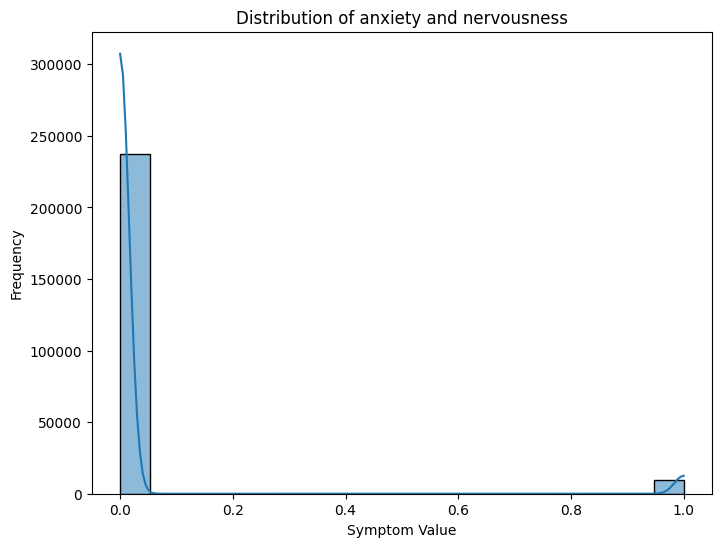


Descriptive Statistics for column 'anxiety and nervousness':
count    246945.000000
mean          0.039235
std           0.194155
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: anxiety and nervousness, dtype: float64
--------------------------------------------------


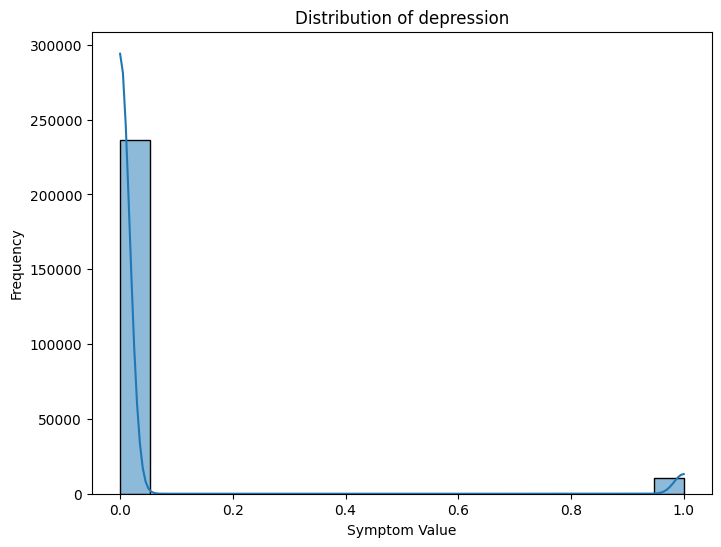


Descriptive Statistics for column 'depression':
count    246945.000000
mean          0.042746
std           0.202285
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: depression, dtype: float64
--------------------------------------------------


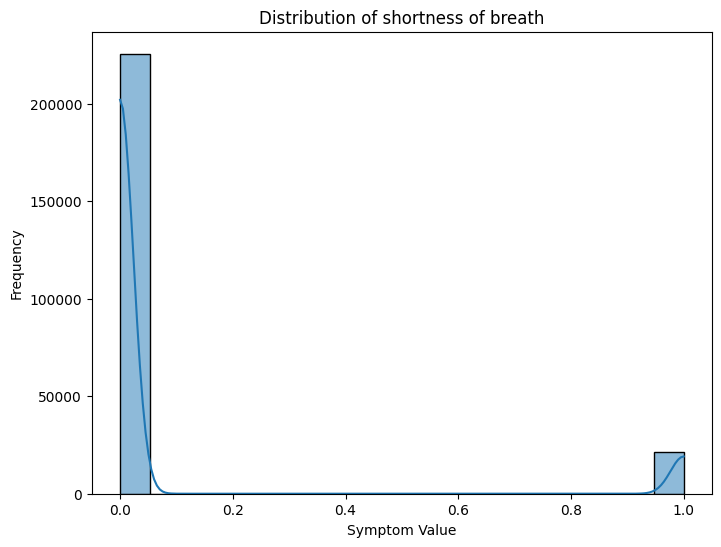


Descriptive Statistics for column 'shortness of breath':
count    246945.000000
mean          0.086440
std           0.281014
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: shortness of breath, dtype: float64
--------------------------------------------------


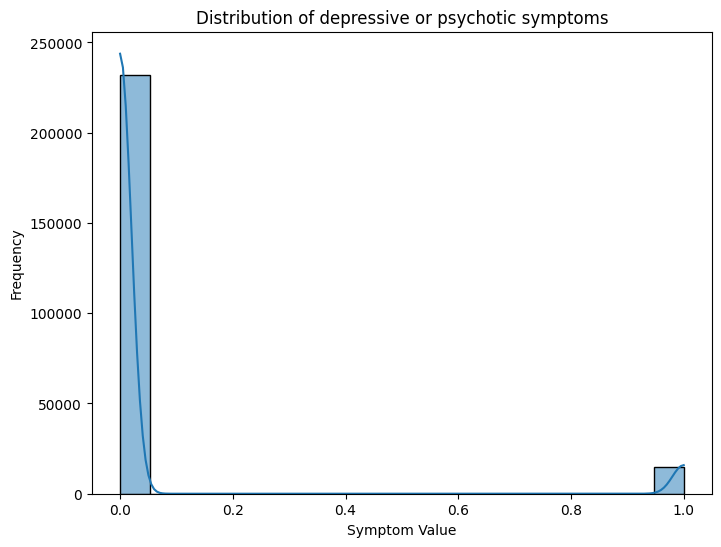


Descriptive Statistics for column 'depressive or psychotic symptoms':
count    246945.000000
mean          0.061001
std           0.239333
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: depressive or psychotic symptoms, dtype: float64
--------------------------------------------------

Applying frequency-based symptom selection...
Available disease dummy columns: ['diseases_abdominal hernia', 'diseases_abscess of nose', 'diseases_abscess of the lung', 'diseases_abscess of the pharynx', 'diseases_acanthosis nigricans', 'diseases_acariasis', 'diseases_achalasia', 'diseases_acne', 'diseases_actinic keratosis', 'diseases_acute bronchiolitis', 'diseases_acute bronchitis', 'diseases_acute bronchospasm', 'diseases_acute fatty liver of pregnancy (aflp)', 'diseases_acute glaucoma', 'diseases_acute kidney injury', 'diseases_acute otitis media', 'diseases_acute pancreatitis', 'diseases_acute respiratory distress syndrome (

In [45]:
# ## 9. Dataset Modification for Performance Improvement


# 1. Load Dataset
# data = pd.read_csv("Final_Augmented_dataset_Diseases_and_Symptoms.csv")
# 2. Create a copy for processing
data_processed = data.copy()

print("Original dataset shape (before dummy encoding):", data_processed.shape)

# 3. Identify and Convert Non-Numeric Columns to Dummy Variables
non_numeric_columns = data_processed.select_dtypes(exclude=['number']).columns.tolist()
print(f"Non-numeric columns identified: {non_numeric_columns}")

# *** DEBUG PRINT - Check non_numeric_columns just before get_dummies ***
print(f"DEBUG: non_numeric_columns just before get_dummies: {non_numeric_columns}")

# Apply one-hot encoding; drop_first=True drops the first category for each non-numeric column
data_processed = pd.get_dummies(data_processed, columns=non_numeric_columns, drop_first=True)
print("Shape after one-hot encoding:", data_processed.shape)

# Data Distribution Analysis (for selected symptom columns)
symptom_columns_to_analyze = ['anxiety and nervousness', 'depression', 'shortness of breath', 'depressive or psychotic symptoms']

for column in symptom_columns_to_analyze:
    plt.figure(figsize=(8, 6))
    sns.histplot(data_processed[column], kde=True)  # Histogram with KDE
    plt.title(f'Distribution of {column}')
    plt.xlabel('Symptom Value')
    plt.ylabel('Frequency')
    plt.show()

    print(f"\nDescriptive Statistics for column '{column}':")
    print(data_processed[column].describe())
    print("-" * 50)

# 5. Frequency-Based Symptom Selection (with debugging)
print("\nApplying frequency-based symptom selection...")

# Assuming the first column (after dummy encoding) is the dummy for 'diseases'
# but to be sure, we identify all columns starting with 'diseases_'
disease_dummy_columns = [col for col in data_processed.columns if col.startswith('diseases_')]
print("Available disease dummy columns:", disease_dummy_columns)

# Choose a specific disease column if available; here we try to use 'diseases_Acne'
if 'diseases_Acne' in disease_dummy_columns:
    disease_column_name = 'diseases_Acne'
else:
    # If 'diseases_Acne' isn't present, choose the first available dummy column
    if disease_dummy_columns:
        disease_column_name = disease_dummy_columns[0]
    else:
        raise KeyError("No disease dummy columns found.")

# Debug print for disease column name
print(f"\nDEBUG: disease_column_name: '{disease_column_name}'")
print(f"DEBUG: Type of disease_column_name: {type(disease_column_name)}")
print("-" * 50)

# Select symptom columns based on frequency threshold
symptom_columns = data_processed.columns.drop(disease_dummy_columns)  # All columns except disease dummies
symptom_frequencies = data_processed[symptom_columns].mean()  # Calculate frequency of each symptom
frequency_threshold = 0.05  # Keep symptoms present in at least 5% of the dataset
symptoms_to_keep = symptom_frequencies[symptom_frequencies >= frequency_threshold].index.tolist()

# *** DEBUG: Print column names of data_processed BEFORE column selection (and their type) ***
print("\nDEBUG: Column names in data_processed BEFORE column selection:")
print(data_processed.columns.tolist())
print(f"DEBUG: Type of data_processed.columns: {type(data_processed.columns)}")
print("-" * 50)

# Columns to keep: selected disease dummy + selected symptom columns
columns_to_keep = [disease_column_name] + symptoms_to_keep

# *** DEBUG: Print columns_to_keep just before filtering (and type) ***
print("\nDEBUG: Columns to keep (columns_to_keep):")
print(columns_to_keep)
print(f"DEBUG: Type of columns_to_keep: {type(columns_to_keep)}")
print("-" * 50)

# *** DEBUG: Check if disease_column_name is actually IN data_processed.columns ***
is_disease_col_in_columns = disease_column_name in data_processed.columns
print(f"\nDEBUG: Is '{disease_column_name}' in data_processed.columns? : {is_disease_col_in_columns}")
print("-" * 50)

# Filter the DataFrame to keep only the desired columns
data_processed_frequency_filtered = data_processed[columns_to_keep]

print("Shape after frequency-based symptom selection:", data_processed_frequency_filtered.shape)
print("\nSymptoms kept (based on frequency):")
print(symptoms_to_keep)


In [40]:
# # ## 10. Dataset Modification for Performance Degradation
# # Example: Randomly remove a significant portion of the data (simulate data loss)
# data_degraded = data.sample(frac=0.5, random_state=42)
# print("Degraded dataset shape:", data_degraded.shape)
# # Re-run splitting, balancing, training as above to observe degradation.


Degraded dataset shape: (50, 3)


In [46]:
# ## 10. Dataset Modification for Performance Degradation
# Example: Randomly remove a significant portion of the data (simulate data loss)
data_degraded = data.sample(frac=0.5, random_state=42)
print("Degraded dataset shape:", data_degraded.shape)

# --- Preprocessing for the degraded dataset ---
# 1. Create a copy for processing
data_degraded_processed = data_degraded.copy()

# 2. One-Hot Encode non-numeric columns (using drop_first to avoid collinearity)
non_numeric_columns = data_degraded_processed.select_dtypes(exclude=['number']).columns.tolist()
print(f"Non-numeric columns in degraded data: {non_numeric_columns}")

data_degraded_processed = pd.get_dummies(data_degraded_processed, columns=non_numeric_columns, drop_first=True)
print("Shape after one-hot encoding (degraded):", data_degraded_processed.shape)

# 3. Frequency-Based Symptom Selection
# Identify dummy columns created for the 'diseases' column
disease_dummy_columns = [col for col in data_degraded_processed.columns if col.startswith('diseases_')]
print("Available disease dummy columns in degraded data:", disease_dummy_columns)

# Choose a disease dummy column; here we attempt 'diseases_Acne', or use the first one available.
if 'diseases_Acne' in disease_dummy_columns:
    disease_column_name = 'diseases_Acne'
elif disease_dummy_columns:
    disease_column_name = disease_dummy_columns[0]
else:
    raise KeyError("No disease dummy columns found in degraded data.")

print(f"Selected disease column: '{disease_column_name}'")

# Calculate symptom frequencies (exclude disease dummy columns)
symptom_columns = data_degraded_processed.columns.drop(disease_dummy_columns)
symptom_frequencies = data_degraded_processed[symptom_columns].mean()
frequency_threshold = 0.05  # Keep symptoms present in at least 5% of the dataset
symptoms_to_keep = symptom_frequencies[symptom_frequencies >= frequency_threshold].index.tolist()

# Define columns to keep: the selected disease column plus the high-frequency symptom columns
columns_to_keep = [disease_column_name] + symptoms_to_keep
print("Columns to keep in degraded data:", columns_to_keep)

# Filter the processed DataFrame
data_degraded_filtered = data_degraded_processed[columns_to_keep]
print("Shape after frequency-based symptom selection (degraded):", data_degraded_filtered.shape)

# 4. Prepare Features and Labels
X_degraded = data_degraded_filtered.drop(columns=[disease_column_name])
y_degraded = data_degraded_filtered[disease_column_name]

# 5. Split the Degraded Dataset into Training and Test Sets
X_train_deg, X_test_deg, y_train_deg, y_test_deg = train_test_split(
    X_degraded, y_degraded, test_size=0.2, random_state=42
)
print("Degraded training set shape:", X_train_deg.shape)
print("Degraded test set shape:", X_test_deg.shape)

# 6. Balance the Training Set using SMOTE
# Adjust k_neighbors based on the minority class size if necessary.
sm = SMOTE(random_state=42, k_neighbors=1)
X_train_deg_bal, y_train_deg_bal = sm.fit_resample(X_train_deg, y_train_deg)
print("Balanced degraded training set class distribution:", Counter(y_train_deg_bal))

# 7. Train a Cost-Sensitive Random Forest on the Degraded Dataset
rf_classifier_deg = RandomForestClassifier(
    random_state=42,
    class_weight='balanced',
    n_estimators=100,
    max_depth=10,
    min_samples_split=5,
    min_samples_leaf=2,
    max_features='sqrt'
)
rf_classifier_deg.fit(X_train_deg_bal, y_train_deg_bal)

# 8. Evaluate the Model on the Degraded Test Set
y_pred_deg = rf_classifier_deg.predict(X_test_deg)
print("Classification report on degraded data:")
print(classification_report(y_test_deg, y_pred_deg))


Degraded dataset shape: (123472, 378)
Non-numeric columns in degraded data: ['diseases']
Shape after one-hot encoding (degraded): (123472, 1133)
Available disease dummy columns in degraded data: ['diseases_abdominal hernia', 'diseases_abscess of nose', 'diseases_abscess of the lung', 'diseases_abscess of the pharynx', 'diseases_acanthosis nigricans', 'diseases_acariasis', 'diseases_achalasia', 'diseases_acne', 'diseases_actinic keratosis', 'diseases_acute bronchiolitis', 'diseases_acute bronchitis', 'diseases_acute bronchospasm', 'diseases_acute fatty liver of pregnancy (aflp)', 'diseases_acute glaucoma', 'diseases_acute kidney injury', 'diseases_acute otitis media', 'diseases_acute pancreatitis', 'diseases_acute respiratory distress syndrome (ards)', 'diseases_acute sinusitis', 'diseases_acute stress reaction', 'diseases_adhesive capsulitis of the shoulder', 'diseases_adjustment reaction', 'diseases_adrenal adenoma', 'diseases_adrenal cancer', 'diseases_alcohol abuse', 'diseases_alcoh

In [48]:
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input

In [49]:
# ## 11. Network Architecture Enhancement
# Enhanced model: adding extra layers and batch normalization for improved convergence

# --- Assume you already have your processed training, validation, and test datasets ---
# X_train_bal, y_train_bal, X_val, y_val, X_test, y_test are defined
# Also assume your LabelEncoder 'le' is already fitted with the classes

# Define the enhanced neural network model with an explicit Input layer
model_enhanced = Sequential([
    Input(shape=(X_train_bal.shape[1],)),  # Define the input shape
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(32, activation='relu'),
    Dense(len(le.classes_), activation='softmax')  # Output layer with number of classes
])

# Compile the model
model_enhanced.compile(optimizer='adam',
                       loss='sparse_categorical_crossentropy',
                       metrics=['accuracy'])

# Train the model with early stopping callback
history_enhanced = model_enhanced.fit(
    X_train_bal, y_train_bal,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val),
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)

# Evaluate the enhanced model on the test set
enhanced_loss, enhanced_accuracy = model_enhanced.evaluate(X_test, y_test, verbose=0)
print("Enhanced Neural Network Test Accuracy:", enhanced_accuracy)


Epoch 1/50
4149/4149 ━━━━━━━━━━━━━━━━━━━━ 65s 13ms/step - accuracy: 0.3257 - loss: 3.2875 - val_accuracy: 0.8160 - val_loss: 0.6630
Epoch 2/50
4149/4149 ━━━━━━━━━━━━━━━━━━━━ 45s 11ms/step - accuracy: 0.6852 - loss: 1.1151 - val_accuracy: 0.8497 - val_loss: 0.5099
Epoch 3/50
4149/4149 ━━━━━━━━━━━━━━━━━━━━ 46s 11ms/step - accuracy: 0.7420 - loss: 0.8761 - val_accuracy: 0.8860 - val_loss: 0.3827
Epoch 4/50
4149/4149 ━━━━━━━━━━━━━━━━━━━━ 46s 11ms/step - accuracy: 0.7678 - loss: 0.7804 - val_accuracy: 0.8765 - val_loss: 0.3964
Epoch 5/50
4149/4149 ━━━━━━━━━━━━━━━━━━━━ 45s 11ms/step - accuracy: 0.7873 - loss: 0.7038 - val_accuracy: 0.8937 - val_loss: 0.3412
Epoch 6/50
4149/4149 ━━━━━━━━━━━━━━━━━━━━ 48s 11ms/step - accuracy: 0.7989 - loss: 0.6704 - val_accuracy: 0.9077 - val_loss: 0.2978
Epoch 7/50
4149/4149 ━━━━━━━━━━━━━━━━━━━━ 46s 11ms/step - accuracy: 0.8093 - loss: 0.6268 - val_accuracy: 0.9099 - val_loss: 0.2860
Epoch 8/50
4149/4149 ━━━━━━━━━━━━━━━━━━━━ 45s 11ms/step - accuracy: 0.8145 -

Epoch 1/50
4149/4149 ━━━━━━━━━━━━━━━━━━━━ 81s 18ms/step - accuracy: 0.3317 - auc: 0.5989 - loss: 3.9159 - val_accuracy: 0.8290 - val_auc: 0.7727 - val_loss: 0.6343
Epoch 2/50
4149/4149 ━━━━━━━━━━━━━━━━━━━━ 72s 17ms/step - accuracy: 0.7661 - auc: 0.7880 - loss: 0.8334 - val_accuracy: 0.8615 - val_auc: 0.8061 - val_loss: 0.4699
Epoch 3/50
4149/4149 ━━━━━━━━━━━━━━━━━━━━ 70s 17ms/step - accuracy: 0.8093 - auc: 0.8195 - loss: 0.6365 - val_accuracy: 0.8826 - val_auc: 0.8257 - val_loss: 0.3759
Epoch 4/50
4149/4149 ━━━━━━━━━━━━━━━━━━━━ 72s 17ms/step - accuracy: 0.8271 - auc: 0.8361 - loss: 0.5657 - val_accuracy: 0.8886 - val_auc: 0.8292 - val_loss: 0.3545
Epoch 5/50
4149/4149 ━━━━━━━━━━━━━━━━━━━━ 71s 17ms/step - accuracy: 0.8350 - auc: 0.8413 - loss: 0.5285 - val_accuracy: 0.8864 - val_auc: 0.8352 - val_loss: 0.3627
Epoch 6/50
4149/4149 ━━━━━━━━━━━━━━━━━━━━ 74s 18ms/step - accuracy: 0.8434 - auc: 0.8567 - loss: 0.4951 - val_accuracy: 0.8932 - val_auc: 0.8423 - val_loss: 0.3172
Epoch 7/50
4149/

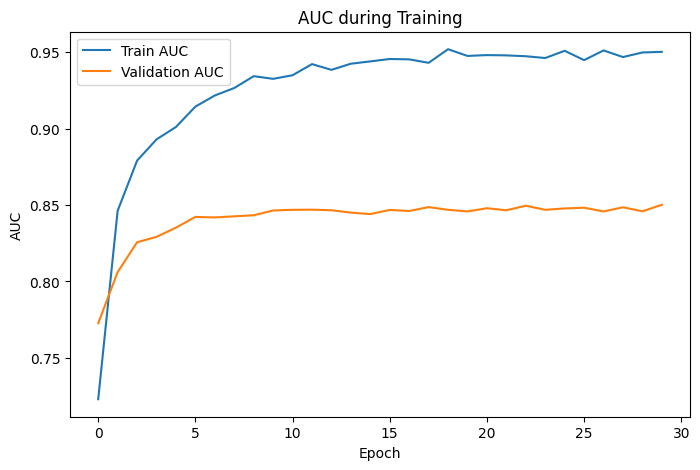

In [53]:
# 12. Propose a New Metric: Adding AUC (Area Under the Curve) 

# Assume that X_train_bal, y_train_bal, X_val, y_val, X_test, y_test are already defined,
# and that you have a fitted LabelEncoder 'le' so that the number of classes is:
num_classes = len(le.classes_)

# Convert labels to one-hot encoding for multi-class AUC computation
y_train_bal_cat = to_categorical(y_train_bal, num_classes=num_classes)
y_val_cat = to_categorical(y_val, num_classes=num_classes)
y_test_cat = to_categorical(y_test, num_classes=num_classes)

# Define the model using an explicit Input layer to avoid the input_shape warning.
model_auc = Sequential([
    Input(shape=(X_train_bal.shape[1],)),  # Explicit input layer
    Dense(64, activation='relu'),
    Dropout(0.2),
    Dense(32, activation='relu'),
    Dense(num_classes, activation='softmax')
])

# When using multi-class outputs, set loss to 'categorical_crossentropy' and
# configure the AUC metric for multi-label mode.
model_auc.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy', tf.keras.metrics.AUC(name='auc', multi_label=True)]
)

# Train the model using one-hot encoded labels.
history_auc = model_auc.fit(
    X_train_bal, y_train_bal_cat,
    epochs=50,
    batch_size=32,
    validation_data=(X_val, y_val_cat),
    callbacks=[EarlyStopping(monitor='val_loss', patience=5, restore_best_weights=True)],
    verbose=1
)

# Evaluate the model on the test set.
test_loss, test_accuracy, test_auc = model_auc.evaluate(X_test, y_test_cat, verbose=0)
print("Enhanced Neural Network Test Accuracy:", test_accuracy)
print("Enhanced Neural Network Test AUC:", test_auc)

# Plot the AUC over epochs.
plt.figure(figsize=(8,5))
plt.plot(history_auc.history['auc'], label='Train AUC')
plt.plot(history_auc.history['val_auc'], label='Validation AUC')
plt.title("AUC during Training")
plt.xlabel("Epoch")
plt.ylabel("AUC")
plt.legend()
plt.show()

In [58]:

def create_imbalance(X, y, majority_frac):
    # אם X כבר מכיל את העמודה 'disease_encoded', נמחוק אותה
    if 'disease_encoded' in X.columns:
        X = X.drop('disease_encoded', axis=1)
        
    # איפוס אינדקסים להבטחת ייחודיות
    X = X.reset_index(drop=True)
    y = y.reset_index(drop=True)
    
    # הרכבת הנתונים לעמודה אחת
    df = pd.concat([X, y], axis=1)
    
    # קביעת המחלקה הרווחת על בסיס mode
    majority_class = y.mode()[0]
    
    # חלוקת הנתונים למספר דגימות של המחלקה הרווחת והקבוצות המיעוטיות
    df_majority = df[df['disease_encoded'] == majority_class]
    df_minority = df[df['disease_encoded'] != majority_class]
    
    # ביצוע undersampling על המחלקה הרווחת לפי הפרופורציה הנתונה
    df_majority_under = df_majority.sample(frac=majority_frac, random_state=42)
    
    # איחוד הנתונים המעודנים
    df_imbalanced = pd.concat([df_majority_under, df_minority])
    
    # חלוקת הנתונים בחזרה למאפיינים ויעד
    X_imb = df_imbalanced.drop('disease_encoded', axis=1)
    y_imb = df_imbalanced['disease_encoded']
    
    return X_imb, y_imb

# שימוש בדוגמה:
imbalance_levels = [1.0, 0.7, 0.4]
for frac in imbalance_levels:
    X_imb, y_imb = create_imbalance(X_train, pd.Series(y_train, name='disease_encoded'), frac)
    print(f"\nImbalance level (majority fraction={frac}): {Counter(y_imb)}")



Imbalance level (majority fraction=1.0): Counter({273: 987, 723: 984, 11: 983, 530: 982, 653: 981, 361: 981, 550: 979, 659: 979, 51: 979, 282: 979, 93: 978, 343: 978, 469: 978, 373: 978, 164: 977, 429: 975, 471: 975, 747: 972, 214: 972, 73: 970, 654: 969, 474: 968, 649: 967, 414: 966, 17: 963, 233: 961, 194: 961, 138: 960, 137: 957, 290: 954, 144: 952, 44: 946, 656: 946, 172: 945, 10: 944, 367: 941, 114: 940, 150: 687, 583: 677, 173: 677, 350: 675, 85: 674, 663: 672, 148: 670, 42: 669, 629: 668, 99: 665, 294: 662, 506: 662, 143: 661, 316: 660, 55: 659, 304: 659, 640: 659, 175: 659, 301: 659, 120: 658, 19: 658, 119: 656, 589: 656, 683: 656, 450: 656, 726: 655, 125: 654, 277: 654, 626: 653, 9: 653, 512: 653, 318: 652, 467: 652, 235: 652, 636: 652, 624: 651, 182: 651, 601: 651, 535: 650, 376: 649, 393: 649, 340: 648, 618: 648, 12: 647, 203: 645, 332: 645, 500: 645, 354: 645, 524: 644, 635: 644, 168: 644, 209: 644, 641: 643, 591: 643, 625: 643, 136: 643, 313: 642, 505: 642, 352: 641, 424:

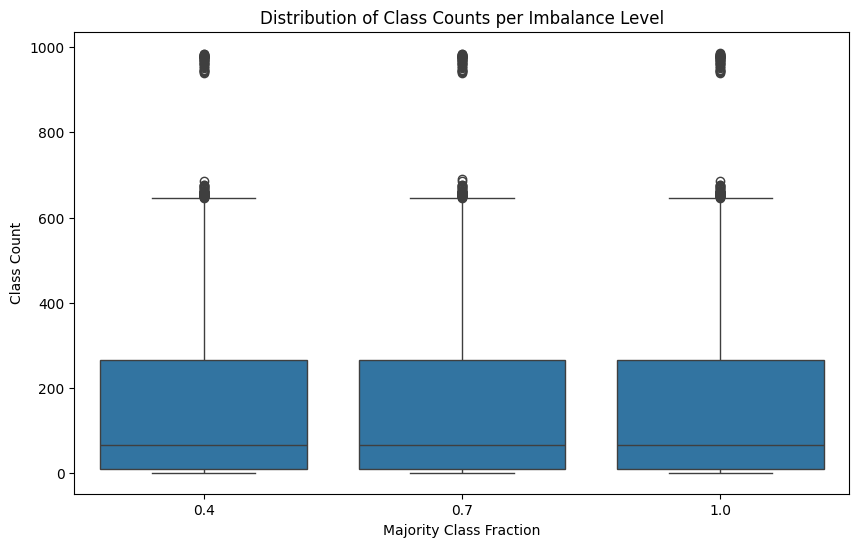

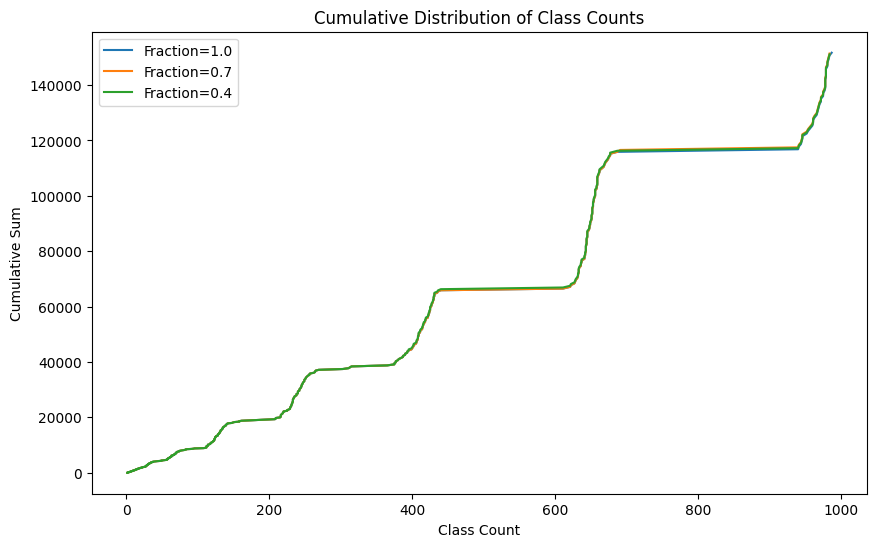

In [60]:

# Create a list to store imbalance statistics for all levels.
imbalance_stats = []

for frac in imbalance_levels:
    X_imb, y_imb = create_imbalance(X_train, pd.Series(y_train, name='disease_encoded'), frac)
    counter = Counter(y_imb)
    for cls, count in counter.items():
        imbalance_stats.append({"imbalance_fraction": frac, "class": cls, "count": count})

# Convert to DataFrame.
df_imbalance = pd.DataFrame(imbalance_stats)

# Boxplot: Show distribution of class counts for each imbalance level.
plt.figure(figsize=(10, 6))
sns.boxplot(x="imbalance_fraction", y="count", data=df_imbalance)
plt.title("Distribution of Class Counts per Imbalance Level")
plt.xlabel("Majority Class Fraction")
plt.ylabel("Class Count")
plt.show()

# Cumulative Distribution Plot: Show cumulative counts for each imbalance level.
plt.figure(figsize=(10, 6))
for frac in imbalance_levels:
    X_imb, y_imb = create_imbalance(X_train, pd.Series(y_train, name='disease_encoded'), frac)
    counter = Counter(y_imb)
    # Get counts sorted in ascending order.
    counts = np.sort(np.array(list(counter.values())))
    cumulative = np.cumsum(counts)
    plt.plot(counts, cumulative, label=f"Fraction={frac}")

plt.xlabel("Class Count")
plt.ylabel("Cumulative Sum")
plt.title("Cumulative Distribution of Class Counts")
plt.legend()
plt.show()


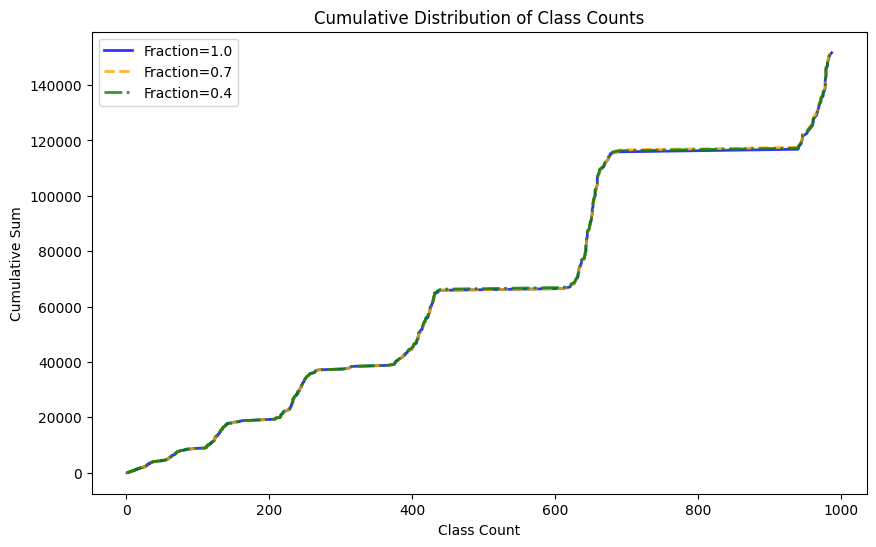

In [62]:
colors = ["blue", "orange", "green"]
linestyles = ["-", "--", "-."]

plt.figure(figsize=(10, 6))
for i, frac in enumerate(imbalance_levels):
    X_imb, y_imb = create_imbalance(X_train, pd.Series(y_train, name='disease_encoded'), frac)
    counter = Counter(y_imb)
    counts = np.sort(np.array(list(counter.values())))
    cumulative = np.cumsum(counts)
    
    plt.plot(
        counts,
        cumulative,
        color=colors[i],
        linestyle=linestyles[i],
        linewidth=2,
        alpha=0.8,
        label=f"Fraction={frac}"
    )

plt.xlabel("Class Count")
plt.ylabel("Cumulative Sum")
plt.title("Cumulative Distribution of Class Counts")
plt.legend()
plt.show()

In [61]:
# ## 14. Dimensionality Reduction: Apply PCA
pca = PCA(n_components=0.95)  # Retain 95% variance
X_train_pca = pca.fit_transform(X_train)
X_val_pca = pca.transform(X_val)
X_test_pca = pca.transform(X_test)

print("Original feature shape:", X_train.shape)
print("Reduced feature shape:", X_train_pca.shape)

# Train a Decision Tree on the PCA-reduced data as an example
dt_clf_pca = DecisionTreeClassifier(random_state=42)
dt_clf_pca.fit(X_train_pca, y_train)
y_pred_dt_pca = dt_clf_pca.predict(X_test_pca)
acc_dt_pca = accuracy_score(y_test, y_pred_dt_pca)
print("Decision Tree Accuracy on PCA-reduced data:", acc_dt_pca)


Original feature shape: (151702, 378)
Reduced feature shape: (151702, 1)
Decision Tree Accuracy on PCA-reduced data: 0.9997626957759849
